In [1]:
import ROOT
from ROOT import gStyle, gPad
import uuid

In [5]:
MEM = []

def make_eff(input_dir, key):
    h_den = input_dir.Get(key)
    h_num = input_dir.Get(key + '_matched')
    try:
        eff = ROOT.TEfficiency(h_num, h_den)
    except Exception as exception:
        print(key, h_num, h_den)
        print(key in [each.GetName() for each in input_dir.GetListOfKeys()])
        input_dir.ls()
        raise exception
    global MEM
    MEM += [eff]
    return eff

In [2]:
class Canvas:
    def __init__(self, height=500, width=500, nx=1, ny=1):
        self.canvas = ROOT.TCanvas(f'c-{uuid.uuid4()}', '', width, height)
        if nx > 1 or ny > 1:
            self.canvas.Divide(nx, ny)

    def __enter__(self):
        return self.canvas

    def __exit__(self, type, value, trace_back):
        self.canvas.Draw()

In [11]:
gStyle.SetOptStat(0)

path = './DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'

root_file = ROOT.TFile(path)

eff_dir = root_file.Get('DQMData/Run 1/GEM/Run summary/Efficiency/GEMCSCSegment/Efficiency')

In [12]:
eff_dir.ls()

TDirectoryFile*		Efficiency	Efficiency
 KEY: TH1F	chamber_GE11-M-L1;1	 GE11-M-L1
 KEY: TH1F	chamber_GE11-M-L1_matched;1	 GE11-M-L1
 KEY: TH1F	chamber_GE11-M-L2;1	 GE11-M-L2
 KEY: TH1F	chamber_GE11-M-L2_matched;1	 GE11-M-L2
 KEY: TH1F	chamber_GE11-P-L1;1	 GE11-P-L1
 KEY: TH1F	chamber_GE11-P-L1_matched;1	 GE11-P-L1
 KEY: TH1F	chamber_GE11-P-L2;1	 GE11-P-L2
 KEY: TH1F	chamber_GE11-P-L2_matched;1	 GE11-P-L2
 KEY: TProfile	eff_chamber_GE11-M-L1;1	 GE11-M-L1
 KEY: TProfile	eff_chamber_GE11-M-L2;1	 GE11-M-L2
 KEY: TProfile	eff_chamber_GE11-P-L1;1	 GE11-P-L1
 KEY: TProfile	eff_chamber_GE11-P-L2;1	 GE11-P-L2
 KEY: TProfile	eff_me11_gemcsc;1	
 KEY: TProfile	eff_muon_chamber_GE11-M-L1;1	 GE11-M-L1
 KEY: TProfile	eff_muon_chamber_GE11-M-L2;1	 GE11-M-L2
 KEY: TProfile	eff_muon_chamber_GE11-P-L1;1	 GE11-P-L1
 KEY: TProfile	eff_muon_chamber_GE11-P-L2;1	 GE11-P-L2
 KEY: TProfile	eff_reduced_chi2_GE11-M-L1;1	 GE11-M-L1
 KEY: TProfile	eff_reduced_chi2_GE11-M-L2;1	 GE11-M-L2
 KEY: TProfile	eff_reduced_ch

Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_GE11-P-L1.png has been created
Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_GE11-P-L2.png has been created
Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_GE11-M-L1.png has been created
Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_GE11-M-L2.png has been created


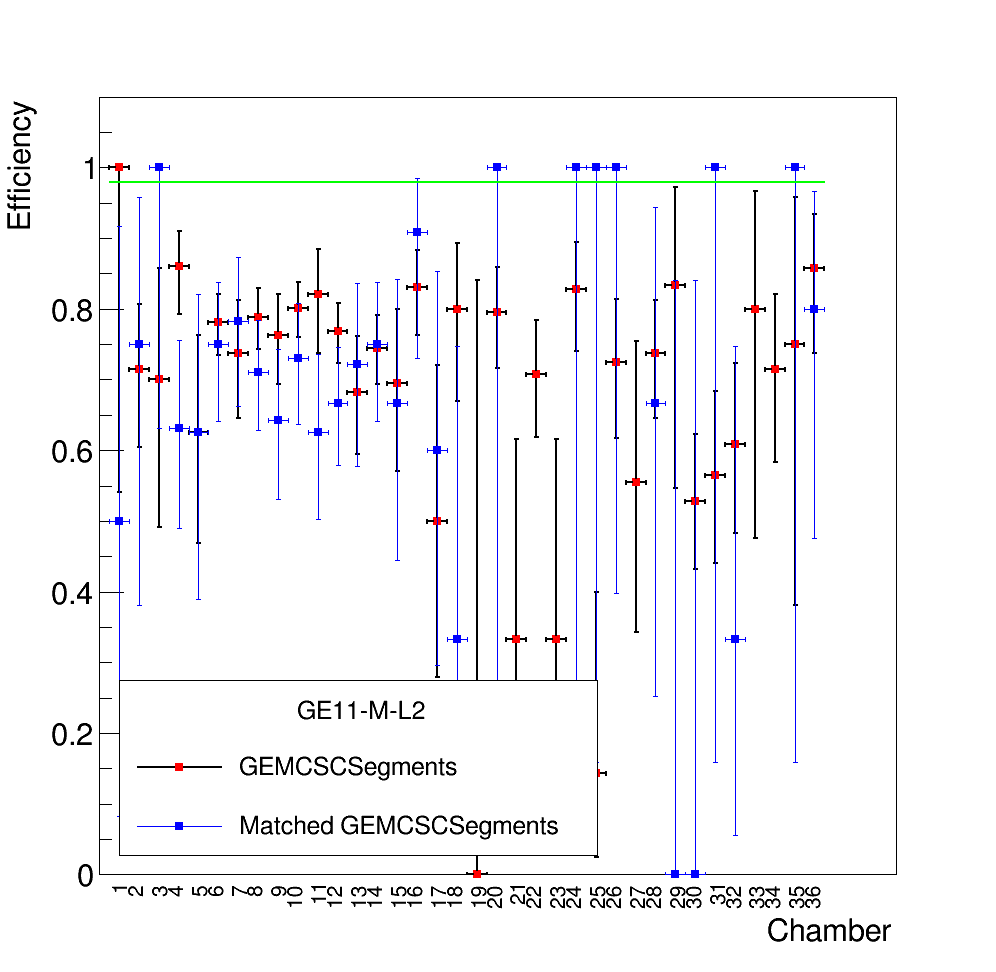

In [70]:
det_list = [
    'GE11-P-L1',
    'GE11-P-L2',
    'GE11-M-L1',
    'GE11-M-L2',
]

for det in det_list:
    with Canvas(1000, 1000) as c:
        eff = make_eff(eff_dir, f'chamber_{det}')
        eff.SetLineColor(ROOT.kBlack)
        eff.SetLineWidth(2)
        eff.SetMarkerStyle(ROOT.kFullSquare)
        eff.SetMarkerColor(ROOT.kRed)
        eff.Draw()
        eff.SetTitle(';Chamber;Efficiency')

        eff_mu = make_eff(eff_dir, 'muon_chamber_GE11-M-L1')
        eff_mu.SetLineColor(ROOT.kBlue)
        eff_mu.SetLineWidth(1)
        eff_mu.SetMarkerStyle(ROOT.kFullSquare)
        eff_mu.SetMarkerColor(ROOT.kBlue)
        eff_mu.Draw(' SAME')

        legend = ROOT.TLegend(0.12, 0.12, 0.6, 0.3)
        legend.AddEntry(eff, 'GEMCSCSegments', 'pl')
        legend.AddEntry(eff_mu, 'Matched GEMCSCSegments', 'pl')
        legend.SetHeader(det, 'C')
        legend.Draw('SAME')
        
        line = ROOT.TLine(0.5, 0.98, 36.5, 0.98)
        line.SetLineColor(ROOT.kGreen)
        line.SetLineWidth(2)
        line.Draw('SAME')
        
        c.SaveAs(f'./output/GEMCSCSegment_{det}.png')

Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_chi2GE11-P-L1.png has been created
Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_chi2GE11-P-L2.png has been created
Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_chi2GE11-M-L1.png has been created
Info in <TCanvas::Print>: png file ./output/GEMCSCSegment_chi2GE11-M-L2.png has been created


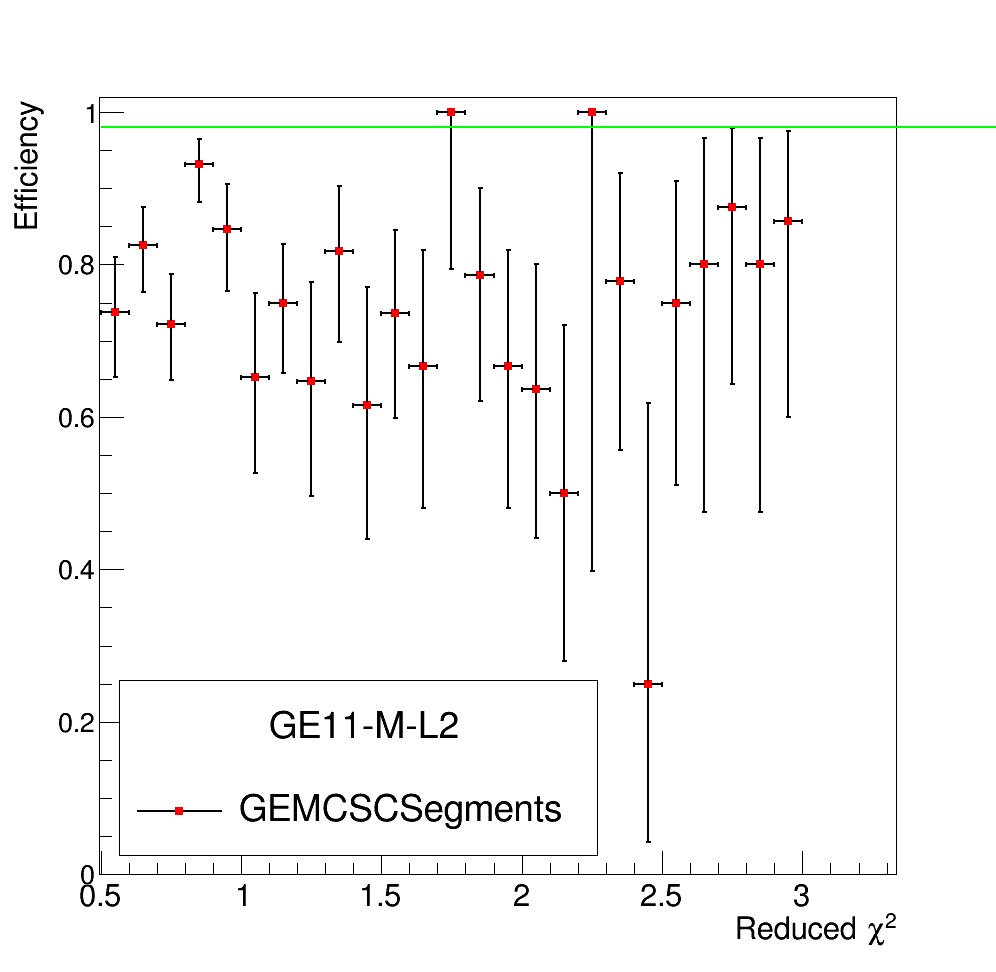

In [72]:
det_list = [
    'GE11-P-L1',
    'GE11-P-L2',
    'GE11-M-L1',
    'GE11-M-L2',
]

for det in det_list:
    with Canvas(1000, 1000) as c:
        eff = make_eff(eff_dir, f'reduced_chi2_{det}')
        eff.SetLineColor(ROOT.kBlack)
        eff.SetLineWidth(2)
        eff.SetMarkerStyle(ROOT.kFullSquare)
        eff.SetMarkerColor(ROOT.kRed)
        eff.Draw()
        eff.SetTitle(';Reduced #chi^{2};Efficiency')
        c.Draw()
        #eff.GetPaintedGraph().SetMinimum(0.8)
        eff.GetPaintedGraph().SetMaximum(1.02)
        eff.GetPaintedGraph().GetYaxis().SetLabelSize(0.03)
        eff.GetPaintedGraph().GetXaxis().SetRangeUser(0.5, 36.5)

        line = ROOT.TLine(0.5, 0.98, 36.5, 0.98)
        line.SetLineColor(ROOT.kGreen)
        line.SetLineWidth(2)
        line.Draw('SAME')
        
        legend = ROOT.TLegend(0.12, 0.12, 0.6, 0.3)
        legend.AddEntry(eff, 'GEMCSCSegments', 'pl')
        legend.SetHeader(det, 'C')
        legend.Draw('SAME')
        
        c.SaveAs(f'./output/GEMCSCSegment_chi2{det}.png')